# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [2]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

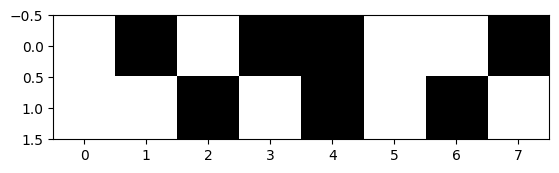

In [3]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



#A1 $U(x) = \sum_{c} V_c(x) = 16\beta$


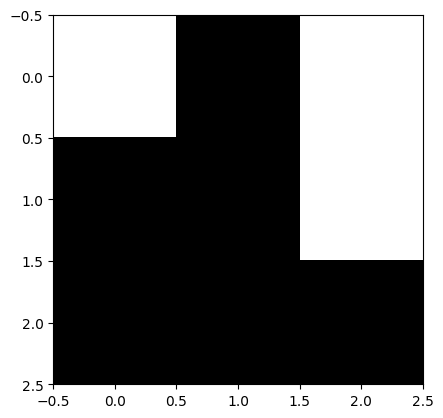

In [4]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


#A2 $P(X_s=x_s|V_s)=\frac {e^{-U_s(x_s,V_s)}}{Z_s}$\
$U_s(0,V_s)= 3\beta$ and $U_s(1,V_s)=5\beta$\
$P(X_s=0|v_s)=\frac {e^{-3\beta}}{e^{-3\beta}+e^{-5\beta}}$ and $P(X_s=1|v_s)=\frac {e^{-5\beta}}{e^{-3\beta}+e^{-5\beta}}$\
$P(X_s=0|v_s) > P(X_s=1|v_s)$ The most probable class is $x_s=0$, the central pixel should be black.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



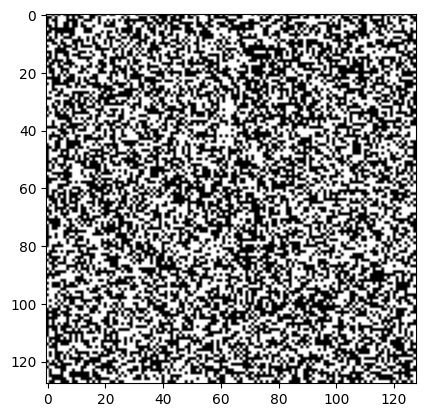

In [5]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [6]:
def echan(im_bin,beta_reg):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=(im_bin[i1][j]+im_bin[i2][j]+im_bin[i][j1]+im_bin[i][j2])*beta_reg
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= 4*beta_reg-Ureg0
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

<Figure size 640x480 with 0 Axes>

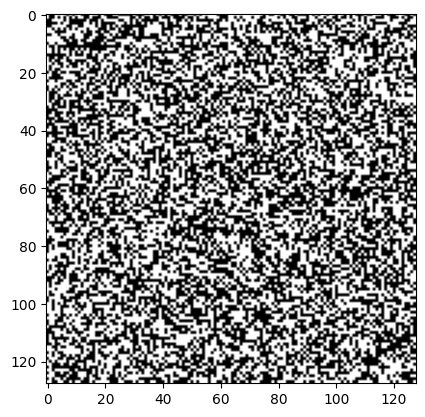

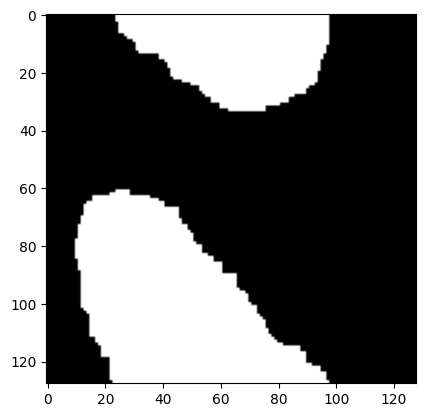

In [22]:

# random initialization of im_bin

plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
#plt.imshow(im_bin)

beta_reg=10

mafigure=plt.figure()
plt.imshow(im_bin);
mafigure.canvas.draw()
plt.show()

for n in range(1000):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

#A3 The program does not always give the same result which is expected since the decision for the new value of a pixel is based on probabilities. However the resulting images are all pretty similar which means the initialization does not impact the result of the algorithm, only the clique potentials do.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

#A4 With $\beta = 0.5$ the image does not change much, for all other values up to 20 the result is an image in which black pixels form clusters, there are nearly no lone black pixel anymore. The value of $\beta$ transcribes to the severity of the decision of each pixel's new value.

#Q5
Which image minimizes the overall energy for this model?

#A5 The image that minimizes the overall energy for this model is an image with only one color, black or white which is chosen at random


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

#A6
A negative value of $\beta$ gives an image that looks like a chessboard, on pixel in two is white, the other is black. This happens because a negative value of $\beta$ increases the probablility for a pixel to take a different value than its neighbors.

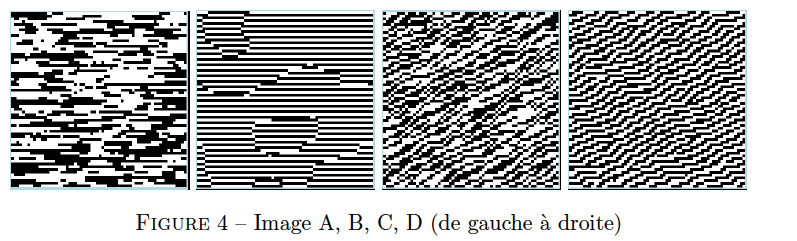

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





#A7
- Image A: we choose thr horizontal clique potential $V_c(0,0) = V_c(1,1) = -1$
- Image A: we add the vertical clique potential $V_c(0,1) = V_c(1,0) = 1$
- Image A: we add the diagonal $+\frac \pi 4$ clique potential $V_c(0,0) = V_c(1,1) = -1$
- Image A: we add the diagonal $+\frac {3\pi} 4$ clique potential $V_c(0,1) = V_c(1,0) = 1$


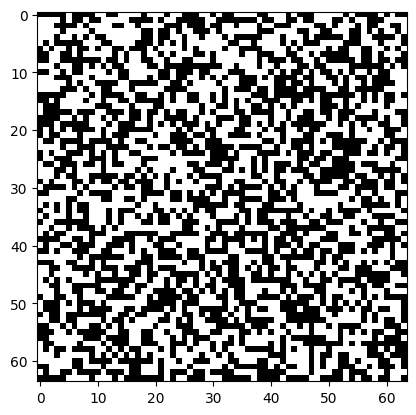

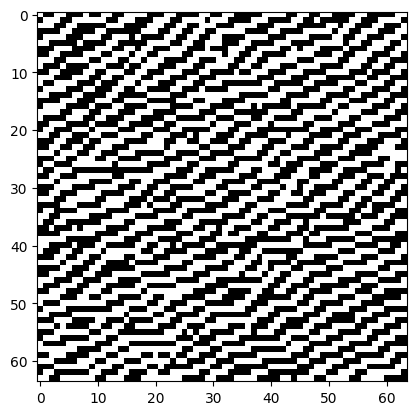

In [17]:
plt.set_cmap('gray')
sh=[64,64]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

for n in range(1000):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            Ureg0=im_bin[i][j2]+im_bin[i][j1]-im_bin[i1][j]-im_bin[i2][j]+im_bin[i2][j1]+im_bin[i1][j2]-im_bin[i1][j1]-im_bin[i2][j2]
            p0=math.exp(-Ureg0)

            Ureg1=im_bin[i1][j]+im_bin[i2][j]+im_bin[i1][j1]+im_bin[i2][j2]-(im_bin[i][j1]+im_bin[i][j2]+im_bin[i2][j1]+im_bin[i1][j2])
            p1=math.exp(-Ureg1)

            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

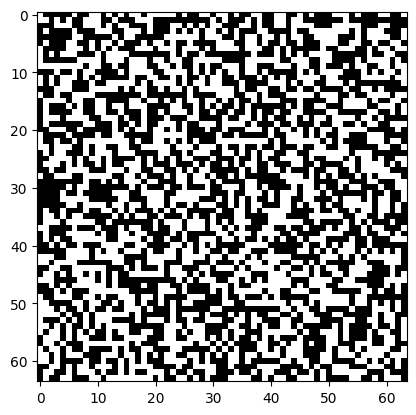

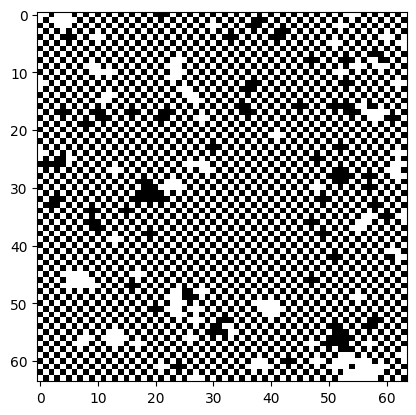

In [20]:
plt.set_cmap('gray')
sh=[64,64]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

for n in range(1500):
    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            Ureg0=im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2]-4
            p0=math.exp(-Ureg0)

            Ureg1=-(im_bin[i1][j1]+im_bin[i1][j2]+im_bin[i2][j1]+im_bin[i2][j2])
            p1=math.exp(-Ureg1)

            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1


plt.figure()
plt.imshow(im_bin)
plt.show()

#A8 We expected to obtain this chessboard patern because it has constant value along the diagonals